In [16]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline


def draw_opt(opt_df):
    gainloss_df = pd.DataFrame()
    gap = 0.0001
    (start, end) = (mean(opt_df.loc['X']) - 0.5, mean(opt_df.loc['X']) + 0.5)
    for opt_num in opt_df.columns:
        opt_info = opt_df.loc[['direction', 'catagory'], opt_num].tolist()
        price = opt_df.loc['price', opt_num]
        X = opt_df.loc['X', opt_num]
        count = opt_df.loc['count', opt_num]

        if opt_info == ['buy', 'call']:  # 买入看涨期权
            v = [(-price * count) for i in np.arange(start, X - gap * 0.1, gap)]
            for i in np.arange(X, end - gap * 0.1, gap):
                v.append((i - X - price) * count)
        elif opt_info == ['buy', 'put']:  # 买入看跌期权
            v = []
            for i in np.arange(start, X - gap * 0.1, gap):
                v.append((X - i - price) * count)
            v += [(-price * count) for i in np.arange(X, end - gap * 0.1, gap)]
        elif opt_info == ['sell', 'call']:  # 卖出看涨期权
            v = [(price * count) for i in np.arange(start, X - gap * 0.1, gap)]
            for i in np.arange(X, end - gap * 0.1, gap):
                v.append(-(i - X - price) * count)
        elif opt_info == ['sell', 'put']:  # 卖出看跌期权
            v = []
            for i in np.arange(start, X - gap * 0.1, gap):
                v.append(-(X - i - price) * count)
            v += [(price * count) for i in np.arange(X, end - gap * 0.1, gap)]

        gainloss_df[opt_num] = v

    gainloss_df.index = np.arange(start, end - gap * 0.1, gap)
    gainloss_df['sum'] = gainloss_df['opt1'] + gainloss_df['opt2']

    plt.figure(figsize=(12, 8))
    # 正常显示负号
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(gainloss_df['opt1'], '--', label='opt1')
    plt.plot(gainloss_df['opt2'], '--', label='opt2')
    plt.plot(gainloss_df['sum'], c='r', label='sum')
    plt.axhline(0, c='gray')
    plt.ylim(min(gainloss_df['sum']) - 0.2, max(gainloss_df['sum']) + 0.2)
    plt.xlim(start, end)
    plt.xticks(np.arange(start, end, 0.1))
    #plt.grid(True)
    plt.legend()
    plt.show()

**买入两份价外认购期权，同时卖出一份价内认购期权**

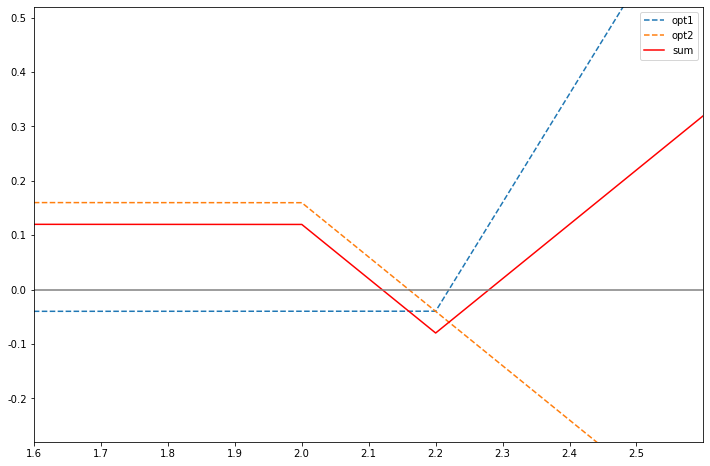

In [17]:
opt_df = pd.DataFrame(index=['direction',  # 买卖方向
                             'catagory',   # 期权类型（call、put）
                             'price',      # 期权价格
                             'X',          # 执行价
                             'count'])     # 期权份数
opt_df['opt1'] = ['buy', 'call', 0.02, 2.2, 2]
opt_df['opt2'] = ['sell', 'call', 0.16, 2, 1]
draw_opt(opt_df)

**同时买入相同行权价的认购和认沽期权**

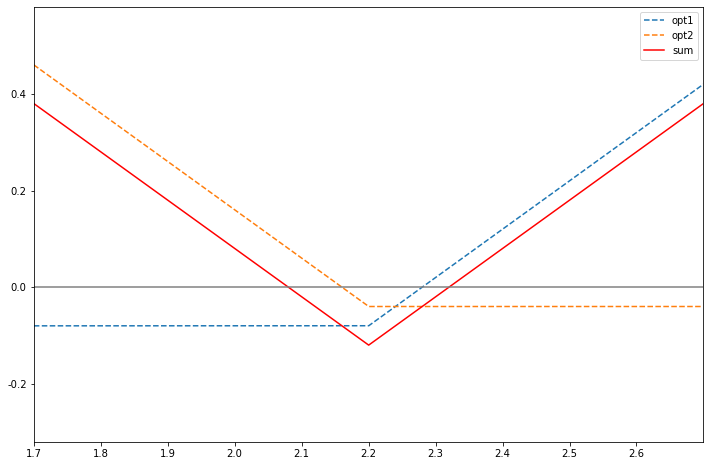

In [18]:
opt_df['opt1'] = ['buy', 'call', 0.08, 2.2, 1]
opt_df['opt2'] = ['buy', 'put', 0.04, 2.2, 1]
draw_opt(opt_df)